In [89]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
### Loading dataset and cleaning some rows.
dataset = pd.read_csv("books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [16]:
### What our dataset looks like (first 5 rows).
dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [17]:
### What our dataset looks like (last 5 rows).

dataset.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


We have 11,123 rows

In [18]:
### Description of our dataset: name, count and data type.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [19]:
### Check to see if there are any null values, though judging by the figure above, we already know that there aren't any.

dataset.isnull().values.any()

False

No null values in the dataset

In [20]:
### Our column names, also known as our features.

dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

12 columns

In [69]:
###Taking a look at the Continuous Variables

contVars = ['bookID', 'average_rating', 'isbn13','  num_pages','ratings_count', 'text_reviews_count']

In [37]:
dataset[contVars].describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


array([[<AxesSubplot:title={'center':'bookID'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'isbn13'}>,
        <AxesSubplot:title={'center':'  num_pages'}>],
       [<AxesSubplot:title={'center':'ratings_count'}>,
        <AxesSubplot:title={'center':'text_reviews_count'}>]],
      dtype=object)

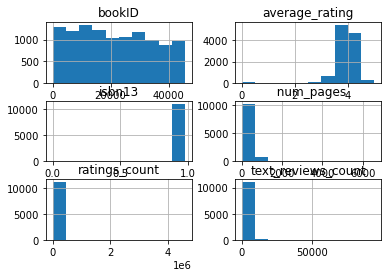

In [211]:
###Here are the histograms for each of the continuous variables.

dataset[contVars].hist()

array([[<AxesSubplot:title={'center':'bookID'}>]], dtype=object)

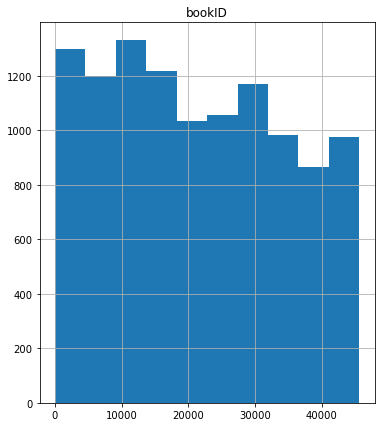

In [212]:
dataset.hist(column="bookID",figsize=(6,7))

array([[<AxesSubplot:title={'center':'average_rating'}>]], dtype=object)

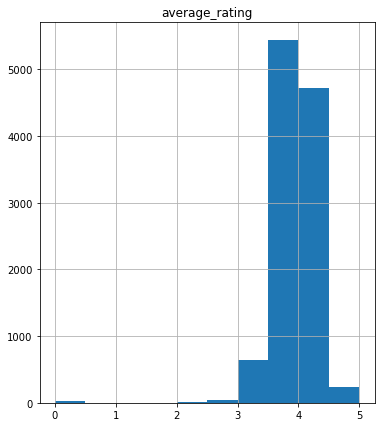

In [71]:
dataset.hist(column="average_rating",figsize=(6,7))

### This is the histogram for 'average_rating', the most important one (our target for the modelling).
### Very concentrated around 3.5 - 4.5

In [53]:
catVars = ['title', 'authors', 'isbn', 'language_code']
dataset[catVars].describe()

##These are the categorical variables:
##8,908 out of the 11,123 books are in english.
##Stephen King has the most books with a total of 40.


,title,authors,isbn,language_code
count,11123,11123,11123,11123
unique,10348,6639,11123,27
top,The Iliad,Stephen King,0743418727,eng
freq,9,40,1,8908


C:\Users\reddr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

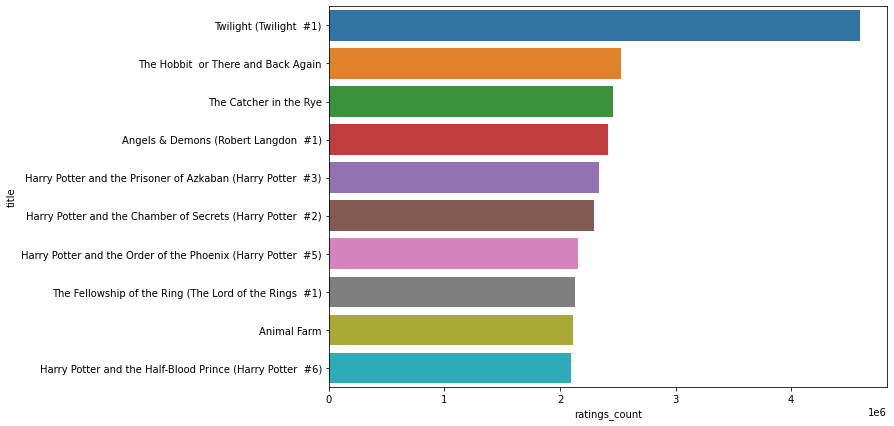

In [68]:
MostReviewedBooks = dataset.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(MostReviewedBooks, MostReviewedBooks.index)

### This barplot shows us the most reviewed books in the dataset, with the first Twilight taking the number 1 spot by a mile.

Linear Regression Model:

We will divide the dataset into two: X and Y, afterwhich we will split these into two further groups, one for training and one for testing. We will train the data and then use that model on the test data and see how efficient it is by using MSE and MAE.

In [202]:
### Divide the data into data and target, i.e. X and Y

dataset2 = ['bookID', 'isbn13', '  num_pages', 'ratings_count', 'text_reviews_count']
dataset[dataset2].describe()

X = dataset[ContVars2]
Y = dataset['average_rating']

In [203]:
print(X.shape)
print(Y.shape)

(11123, 5)
(11123,)


In [204]:
### At this point we should begin splitting the data into a training set and a testing set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [205]:
### The sizes of our training sets (80%)
X_train.shape, Y_train.shape

((8898, 5), (8898,))

In [206]:
### Sizes of our testing sets (20%)
X_test.shape, Y_test.shape

((2225, 5), (2225,))

In [207]:
### Defining the regression model

model = linear_model.LinearRegression()


In [208]:
### We can now build the training model using the fit function


model.fit(X_train, Y_train)


LinearRegression()

In [209]:
### Applying trained model on the test set to make predictions
Y_pred = model.predict(X_test)

In [210]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))


Coefficients: [-7.75217114e-07  1.40799076e-15  2.09791422e-04  7.80853319e-08
  2.97188630e-07]
Intercept: 3.8630762674099217
Mean squared error (MSE): 0.11
Mean Absolute Error (MAE): 0.22900037018895864
Coefficient of determination (R^2): 0.03


In [228]:
### This metric of evaluating the accuracy isn't very useful in this case as we aren't looking at a binary outcome.
### The model will essentially be estimating a value that is very close to the original which is between 0.00 and 5.00.

acc = (Y_pred == Y_test).sum()/len(Y_test)
acc

0.0

Report:

I chose to use Linear Regression as it estimates the relationship between two or more variables and can consider nominal, interval, or categorical variables for analysis.

The features were choses to begin with as the continuous variables(the categorical variables: 'author' and 'publisher' did not increase efficiency). I tried removing them one by one to see if the efficiency would improve, but it did not.

After running it a couple of times, the best score achieved was MSE: 0.10 and MAE: 0.21. For a book score prediction model I think it is a rather acceptable score, if it had been for something more vital like determining whether a patient has a certain disease, it would not be accurate enough.